<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/SLC_ConvoNeuralNet_DigitsExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example: Convolutional Neural Nets and MNIST Data

Dani Bauer, 2023, borrowing from tutorials by [S. Daityari](https://www.sitepoint.com/keras-digit-recognition-tutorial/) and [S. Valdarrama](https://deepnote.com/@svpino/MNIST-with-Convolutional-Neural-Networks-a4b3c412-b802-4185-9806-02640fbba02e)



In this tutorial, we will build some deep learning models for a very basic image classification problem: Predicting digits based on some hand-written images of written digits. This is a fairly classic problem, and the dataset -- which is available in Keras -- is pretty famous. The images consist of 28-by-28 pixels in grey-scale, and the classification problem (obviously) is predicting 0 through 9.

### Load Libraries

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

And let's set a random seed:

In [117]:
np.random.seed(42)

### Loading the MNIST Dataset

The (famous!) [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset consists of 60,000 labeled examples of handwritten digits. It is available in the keras library, so we can just load it.

In [128]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's take a look at the first image:

In [119]:
image_index = 0
y_train[0]

5

So the first image displays a 5.

Here is the corresponding image:

In [ ]:
x_train[0]

So each $x$ variable is a 28 $\times$ 28 matrix of pixel values that denote grey scales, where 0 corresponds to very light and 255, the max value, corresponds to very dark (or the other way around). Let's visualize:

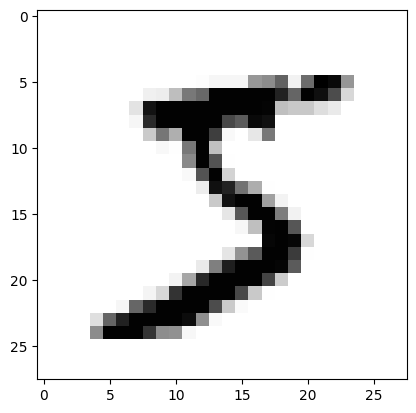

In [121]:
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

So this is about the simplest image dataset one can imagine.

Let's look at a few more:

0


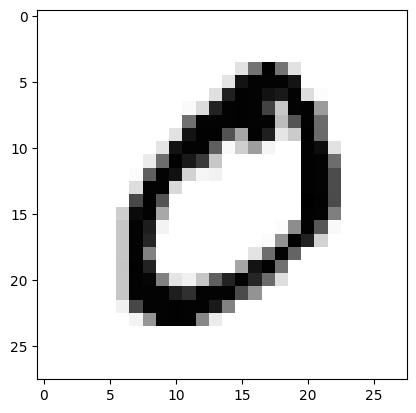

In [122]:
image_index = 1
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

3


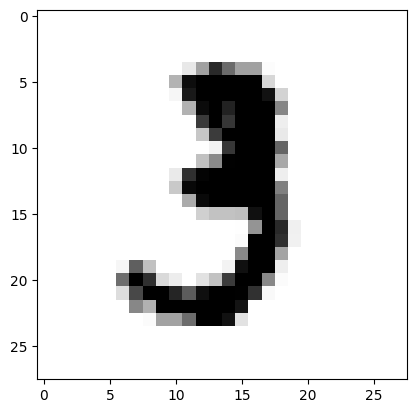

In [123]:
image_index = 10
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Our task is fairly obvious: We want to build a neural network that take the images as the inputs (our $x$-s) and predict the correspondoing digits (our $y$-s).

In doing so, we convert the outcomes to categorical variables:

In [142]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Building and Training a DL Model

We start by building a feed-forward neural network. For that, we convert the images to vectors with $28 \times 28 = 784$ resulting features:

In [130]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

And we scale by dividing by the maximal pixel darkness:

In [131]:
x_train = x_train / 255
x_test = x_test/ 255

And let's build a feed-forward model, as we did before. An important difference, though, is that we use the soft-max function as the output layer for this multi-class problem, and we use 'categorical_crossentropy' as the (multi-class) loss function:

In [110]:
model = Sequential()
model.add(Dense(50, input_shape=(784, ), activation='relu', name='dense_1'))
model.add(Dense(25, activation='relu', name='dense_2'))
model.add(Dense(10, activation='softmax', name='dense_output'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                39250     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_output (Dense)        (None, 10)                260       
                                                                 
Total params: 40785 (159.32 KB)
Trainable params: 40785 (159.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let's train it using 20 epochs:

In [111]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3141 - accuracy: 0.9111 - val_loss: 0.1573 - val_accuracy: 0.9529
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1422 - accuracy: 0.9575 - val_loss: 0.1263 - val_accuracy: 0.9627
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9674 - val_loss: 0.1038 - val_accuracy: 0.9694
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9731 - val_loss: 0.1065 - val_accuracy: 0.9677
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9772 - val_loss: 0.0930 - val_accuracy: 0.9736
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.9799 - val_loss: 0.1009 - val_accuracy: 0.9711
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0900 - val_accuracy:

So the validation loss is not really getting better, arguably we are already overfitting.

Let's evaluate the performance based on some randomly sampled test images:

1/1 [==============================] - 0s 18ms/step


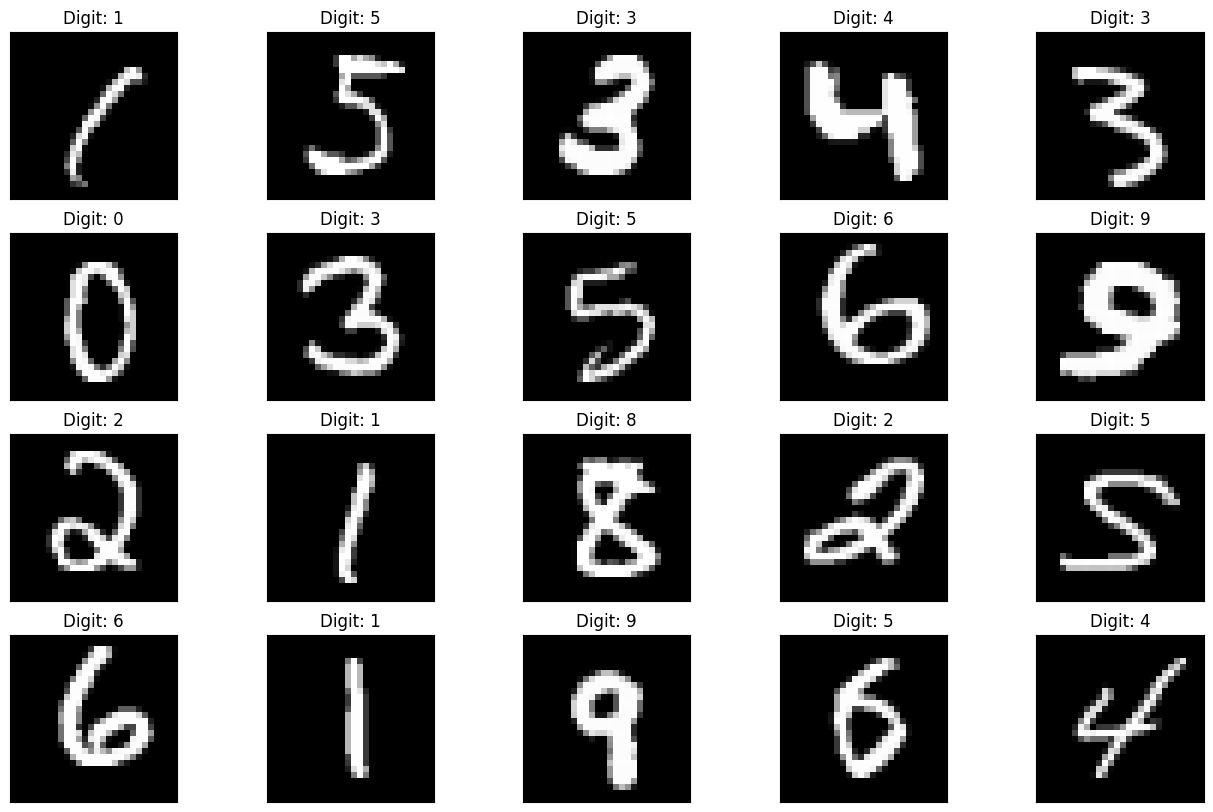

In [132]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

random.seed(5)

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 784)))[0], axis=-1)
    plot_digit(image.reshape(28,28), digit, plt, i)

plt.show()

So it seems like the model performs pretty well, yet it is not perfectly accurate.

## Building and Training a CNN Model

Next let's see if adding convolutional layers can improve the performance.

Let's reload the data and reset the seed:

In [144]:
np.random.seed(42)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

To use the keras interface for convolutional layers, we need to reformat the data---which requires three dimensions. So we `reshape` the data, and we also scale the data by dividing it by the max pixel value (255).

In [145]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train / 255
x_test = x_test/ 255

And then let's build a convolutional neural net:

In [146]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

We use similar model parameters as we did above:

In [148]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [149]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 5408)              0         
                                                                 
 dense_14 (Dense)            (None, 8)                 43272     
                                                                 
 dense_15 (Dense)            (None, 10)                90        
                                                                 
Total params: 43682 (170.63 KB)
Trainable params: 43682 (170.63 KB)
Non-trainable params: 0 (0.00 Byte)
________________

And let's train it:

In [150]:
history = model.fit(x_train, y_train, epochs=20, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 13s 26ms/step - loss: 0.5655 - accuracy: 0.8396 - val_loss: 0.2991 - val_accuracy: 0.9206
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 0.2406 - accuracy: 0.9357 - val_loss: 0.1976 - val_accuracy: 0.9451
Epoch 3/20
469/469 [==============================] - 13s 28ms/step - loss: 0.1647 - accuracy: 0.9546 - val_loss: 0.1527 - val_accuracy: 0.9577
Epoch 4/20
469/469 [==============================] - 13s 29ms/step - loss: 0.1326 - accuracy: 0.9630 - val_loss: 0.1277 - val_accuracy: 0.9636
Epoch 5/20
469/469 [==============================] - 13s 27ms/step - loss: 0.1152 - accuracy: 0.9673 - val_loss: 0.1106 - val_accuracy: 0.9688
Epoch 6/20
469/469 [==============================] - 13s 27ms/step - loss: 0.1014 - accuracy: 0.9708 - val_loss: 0.1139 - val_accuracy: 0.9666
Epoch 7/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0945 - accuracy: 0.9729 - val_loss: 0.1070 - val_accuracy:

So again not much of an improvement in the later epochs, though the performance based on validation loss and accuracy scores are superior to the feed-forward net from above.

Let's evaluate based on the same digits:

1/1 [==============================] - 0s 14ms/step


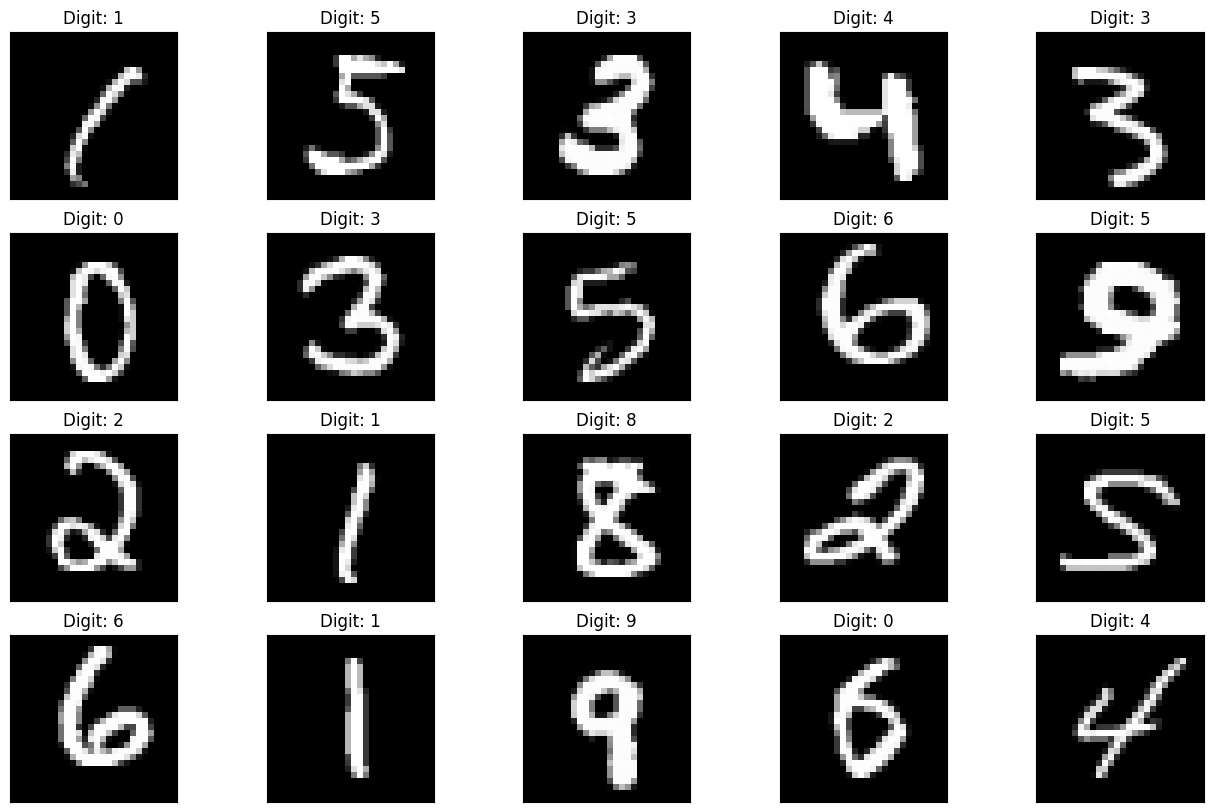

In [151]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

random.seed(5)

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()

So in this example this neural net seems a little worse, though I chose it to get some images it doesn't classify accurately. Experiment with the seed a bit to get an impression.